In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score


In [10]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [12]:
# dropping the first column

df = df.iloc[: , 1:]
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [13]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [14]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 400000, 6, 1],
       [0.0, 1.0, 0.0, ..., 1250000, 7, 0],
       [0.0, 1.0, 0.0, ..., 500000, 4, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 1150000, 6, 1],
       [0.0, 1.0, 0.0, ..., 1000000, 6, 0],
       [0.0, 1.0, 0.0, ..., 500000, 4, 0]], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [21]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

max_depth = []
accuracy_gini = []
accuracy_entropy = []

for i in range(1,16):
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_gini.append(accuracy_score(y_test, y_pred_dec))
    
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_entropy.append(accuracy_score(y_test, y_pred_dec))
     
     max_depth.append(i)

    accuracy_gini  accuracy_entropy  max_depth
0        0.796482          0.796482          1
1        0.801508          0.801508          2
2        0.844221          0.844221          3
3        0.841709          0.841709          4
4        0.844221          0.844221          5
5        0.829146          0.836683          6
6        0.826633          0.824121          7
7        0.834171          0.829146          8
8        0.834171          0.824121          9
9        0.839196          0.826633         10
10       0.829146          0.831658         11
11       0.836683          0.826633         12
12       0.809045          0.824121         13
13       0.814070          0.816583         14
14       0.814070          0.814070         15


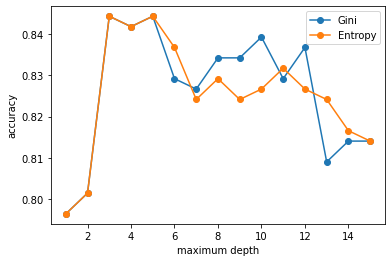

In [22]:
data = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})


plt.plot('max_depth','accuracy_gini', 'o-', data=data, label='Gini')
plt.plot('max_depth','accuracy_entropy', 'o-', data=data, label='Entropy')
plt.xlabel('maximum depth')
plt.ylabel('accuracy')

plt.legend()
print(data)

In [23]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_ran_gini = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42)
clf_ran_gini.fit(X_train, y_train)
y_pred_ran_gini = clf_ran_gini.predict(X_test)
accuracy_score(y_test, y_pred_ran_gini)

0.8115577889447236

In [24]:
clf_ran_entropy = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
clf_ran_entropy.fit(X_train, y_train)
y_pred_ran_entropy = clf_ran_entropy.predict(X_test)
accuracy_score(y_test, y_pred_ran_entropy)

0.8115577889447236

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#logistic Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state = 42)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.7688442211055276